In [29]:
from __future__ import print_function
from __future__ import division

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ROOT import TFile, TTree, TLorentzVector, TRandom3

get_ipython().run_line_magic('matplotlib', 'notebook')

In [30]:
# Load tree from file
inName = "Zto4l_decays.root"
inFile = TFile(inName, "READ")
tree = inFile.Get("tree")


# Initialize RNG
rng = TRandom3()
nEntries = tree.GetEntries()


# Create charge and flavor dictionaries
qMarker = {-1:'_', +1:'+'}
idColor = {11:'r', 13:'b'} # red = electron, blue = muon

<IPython.core.display.Javascript object>


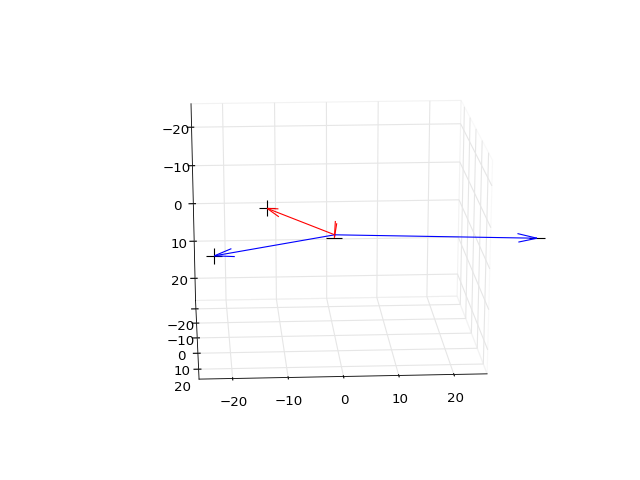

Event 99974


In [31]:
# Get a random event
newEvent = rng.Integer(nEntries)
#newEvent = 11740
tree.GetEntry(newEvent)

leps_p4 = (tree.lep1p4, tree.lep2p4, tree.lep3p4, tree.lep4p4)
leps_q = (tree.lep1q, tree.lep2q, tree.lep3q, tree.lep4q)
leps_id = (tree.lep1id, tree.lep2id, tree.lep3id, tree.lep4id)


# Create axes
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.autoscale(enable=False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False


# Draw vectors and +/- markers
for lep_p4, lep_q, lep_id in zip(leps_p4, leps_q, leps_id):
    ax.quiver(0, 0, 0, lep_p4.Px(), lep_p4.Py(), lep_p4.Pz(), pivot='tail', length=lep_p4.P(), color=idColor[lep_id], \
              arrow_length_ratio=4/lep_p4.P())
    ax.scatter(lep_p4.Px(), lep_p4.Py(), lep_p4.Pz(), marker=qMarker[lep_q], s=200, c='k')


# Adjust axis limits
lim=25
ax.set_xlim(left=-lim, right=lim)
ax.set_ylim(bottom=-lim, top=lim)
ax.set_zlim(bottom=-lim, top=lim)
plt.show()


# Print useful (?) info
print("Event", newEvent)